In [65]:
from funcs.notebook import *

%matplotlib inline

import copy

from funcs.transitmask import get_full_transit_mask, get_transit_mid_epochs

In [2]:
# Composite Table of confirmed exoplanets
path = "../data/PSCompPars_2021.01.08_01.59.05.csv"
print(f"[UP] Using NASA Composite Table from {path}")
df = pd.read_csv(path, skiprows=318) # composite table

[UP] Using NASA Composite Table from ../data/PSCompPars_2021.01.08_01.59.05.csv


In [34]:
df.columns.values

array(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag',
       'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate',
       'disc_locale', 'disc_facility', 'disc_telescope',
       'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag',
       'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag',
       'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbsmax_reflink', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radelim', 'pl_rade_reflink', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_radj_reflink', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim',
       'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassj_reflink'

In [35]:
system = df.loc[(df.hostname == "TRAPPIST-1") &
                (df.discoverymethod == "Transit"),
                ["pl_tranmid", "pl_tranmid_systemref",
                 'pl_tranmiderr1', 'pl_tranmiderr2',
                 "pl_orbper", "pl_orbpererr1", "pl_orbpererr2",
                 "pl_trandur", "pl_trandurerr1", "pl_trandurerr2",
                 ]]
system

,pl_tranmid,pl_tranmid_systemref,pl_tranmiderr1,pl_tranmiderr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_trandur,pl_trandurerr1,pl_trandurerr2
4056,2.457323e+06,BJD-TDB,0.00010,-0.00010,1.510871,6.000000e-07,-6.000000e-07,0.6067,0.0028,-0.0028
4057,2.457283e+06,BJD-TDB,0.00019,-0.00019,2.421823,1.700000e-06,-1.700000e-06,0.7062,0.0037,-0.0037
4058,2.457670e+06,BJD-TDB,0.00035,-0.00035,4.049610,6.300000e-05,-6.300000e-05,0.8188,0.0110,-0.0110
4059,2.457660e+06,BJD-TDB,0.00038,-0.00038,6.099615,1.100000e-05,-1.100000e-05,0.9535,0.0120,-0.0120
4060,2.457671e+06,BJD-TDB,0.00023,-0.00023,9.206690,1.500000e-05,-1.500000e-05,1.0430,0.0100,-0.0100
4061,2.457665e+06,BJD-TDB,0.00021,-0.00021,12.352940,1.200000e-04,-1.200000e-04,1.1400,0.0110,-0.0110
4062,2.457663e+06,BJD-TDB,0.00037,-0.00037,18.767000,4.000000e-03,-3.000000e-03,1.2600,0.0192,-0.0192


In [14]:
from lightkurve import search_lightcurvefile

In [15]:
flcs = search_lightcurvefile("TRAPPIST-1", cadence="short")

In [16]:
flc = flcs[0].download()

In [17]:
flc = flc.get_lightcurve("PDCSAP_FLUX")

In [127]:
offset = {"K2":2454833.,"Kepler":2454833.,"TESS":2457000.}
system["pl_tranmidepoch"] = system.pl_tranmid - offset[flc.mission]

In [160]:
import pytest

from altaipony.flarelc import FlareLightCurve



In [131]:
newflux = copy.deepcopy(flc.flux)
istransit = get_full_transit_mask(system, flc)
newflux[istransit] = np.nan
flc.flux = newflux

(2920.5, 2935.5)

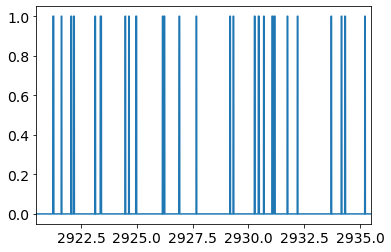

In [134]:
plt.plot(flc.time, istransit, zorder=-5)
plt.xlim(2920.5,2935.5)

# toi

In [ ]:
path = "../data/2021_01_13_TESS_TOI_CATALOG.csv"
print(f"[UP] Using TESS-TOI Table from {path}")
df = pd.read_csv(path, skiprows=4)

In [ ]:
df.columns.values

In [ ]:
'Transit Duration Value', 'Orbital Period Value', 'Epoch Value'